In [1]:
from lib.abstract_torch import get_device, get_loss, get_optimizer
from lib.dataloader import get_MNIST_loaders
from lib.model import ANN
from lib.train import train
from lib.test import test
from lib.growth_schedules import get_handcrafted_schedule
from lib.visualize import (visualize_pathes,
                          visualize_statistical_reliability,
                          visualize_box_plot)               

import os
import numpy as np

In [2]:
device = get_device()

In [3]:
path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "\\data"

In [4]:
batch_size=128

## Get data loaders

In [5]:
train_loader, val_loader, test_loader = get_MNIST_loaders(data_path, range(10), batch_size)

## Define, train and test both root & target models

In [6]:
# Network's initial architecture
num_inputs = 28*28
num_hidden = 10
num_outputs = 10

# Network's final architecture
num_hidden_target = 100

# Loss & optimizer
loss_name = "MSE" # "CE"
loss = get_loss(loss_name)
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
growth_schedule = None

# Experiment parameters
num_repetitions = 2

### Root model

In [7]:
test_acc_roots = []
for i in range(num_repetitions) :
    root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
    optimizer = get_optimizer(optimizer_name, root_model)
    _ = train(root_model, growth_schedule, loss, loss_name, optimizer, train_loader, val_loader, num_epochs, batch_size, device)
    test_acc_root = test(root_model, test_loader, batch_size, device)
    test_acc_roots.append(test_acc_root)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.30s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.18s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.23s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.68s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.54s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.50s/it]

299 batches used in epoch 2
Total number of batches : 900


In [8]:
test_acc_roots

[20.943846153846152, 41.40628205128206]

### Target model

In [9]:
test_acc_targets = []
for i in range(num_repetitions) :
    target_model = ANN(num_inputs, num_hidden_target, num_outputs).to(device)
    optimizer = get_optimizer(optimizer_name, target_model)
    _ = train(target_model, growth_schedule, loss, loss_name, optimizer, train_loader, val_loader, num_epochs, batch_size, device)
    test_acc_target = test(target_model, test_loader, batch_size, device)
    test_acc_targets.append(test_acc_target)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.56s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.63s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.61s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.81s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.72s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.73s/it]

299 batches used in epoch 2
Total number of batches : 900


In [10]:
test_acc_targets

[94.24141025641023, 93.870641025641]

## Grow root model

In [11]:
# Growth parameters
num_neurons = 9

In [12]:
growth_schedules = get_handcrafted_schedule(num_neurons)

In [13]:
test_accs_repeted = []
for i in range(num_repetitions) :
    test_accs = []
    for growth_schedule in growth_schedules :
        root_model = ANN(num_inputs, num_hidden, num_outputs).to(device)
        optimizer = get_optimizer(optimizer_name, root_model)
        _ = train(root_model, growth_schedule, loss, loss_name, optimizer, train_loader, val_loader, num_epochs, batch_size, device, print_num_params=False)
        test_acc = test(root_model, test_loader, batch_size, device)
        test_accs.append(test_acc)
    test_accs_repeted.append(test_accs)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.60s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.60s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.63s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.45s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.45s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.46s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.52s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.49s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.50s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.39s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.43s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.46s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.40s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.63s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.74s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.60s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.63s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.67s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.66s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.73s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:11<00:00,  3.71s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.52s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.64s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.63s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.39s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.41s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.45s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.56s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.51s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.59s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.58s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.54s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.55s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.44s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:03,  3.49s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.51s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:06,  3.45s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.52s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.57s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.67s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.66s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.07s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:03<00:07,  3.93s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:08<00:04,  4.08s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.19s/it]

299 batches used in epoch 2
Total number of batches : 900



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

49 batches used in epoch 0
99 batches used in epoch 0
149 batches used in epoch 0
199 batches used in epoch 0
249 batches used in epoch 0


 33%|████████████████████████████                                                        | 1/3 [00:04<00:08,  4.01s/it]

299 batches used in epoch 0
Total number of batches : 300
49 batches used in epoch 1
99 batches used in epoch 1
149 batches used in epoch 1
199 batches used in epoch 1
249 batches used in epoch 1


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:07<00:03,  3.95s/it]

299 batches used in epoch 1
Total number of batches : 600
49 batches used in epoch 2
99 batches used in epoch 2
149 batches used in epoch 2
199 batches used in epoch 2
249 batches used in epoch 2


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.14s/it]

299 batches used in epoch 2
Total number of batches : 900


In [14]:
test_accs_repeted = np.array(test_accs_repeted)
test_accs = np.mean(test_accs_repeted, 0)

## Visualize results

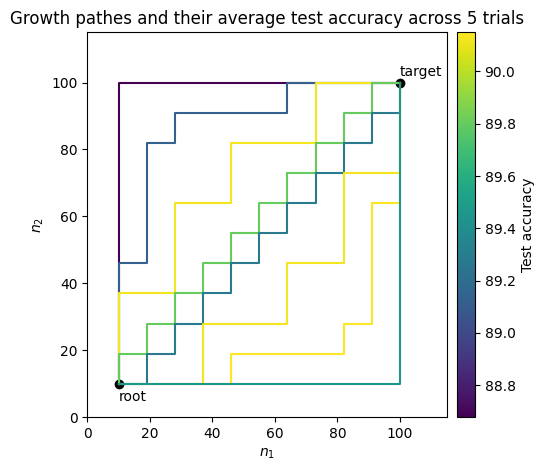

In [15]:
visualize_pathes(num_hidden, num_hidden_target, growth_schedules, test_accs)

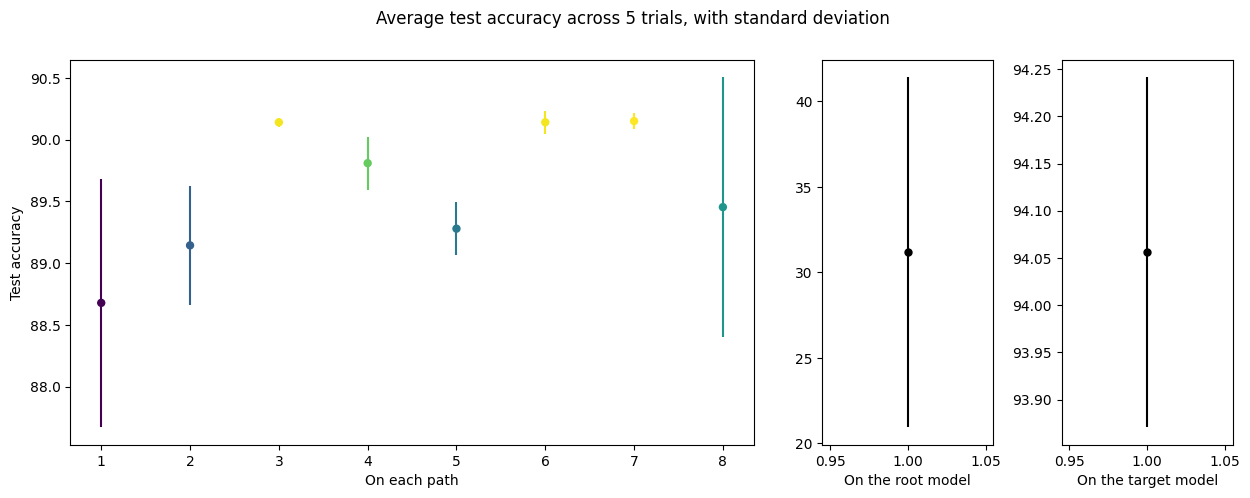

In [16]:
visualize_statistical_reliability (test_accs_repeted, test_accs, test_acc_roots, test_acc_targets,
                                   free_lim=True)

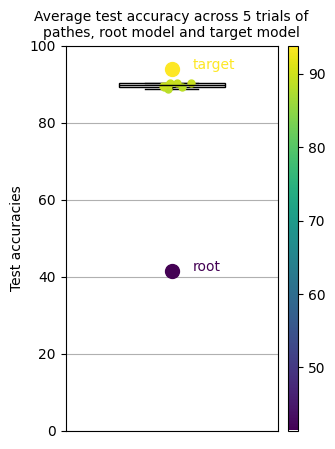

In [17]:
visualize_box_plot(test_accs, test_acc_root, test_acc_target)